In [94]:
import os
import numpy as np 
import pandas as pd 
from skimage import io, transform
from shutil import copyfile
import random
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [95]:
classes = ['0','1','2','3','4','5','6','7','8','9',
            'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
            'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'
            ]
data_transforms = { 
            'train': transforms.Compose([
                    transforms.Resize((32,32)),
                    transforms.Grayscale(num_output_channels=1),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                    transforms.Normalize([0.485], [0.229])
                    ]),
            'val' : transforms.Compose([
                    transforms.Resize((32,32)),
                    transforms.Grayscale(num_output_channels=1),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                    transforms.Normalize([0.485], [0.229])
                    ])
                }

trainset = datasets.ImageFolder(r"data\train",data_transforms['train'])
valset = datasets.ImageFolder(r"data\val",data_transforms['val'])
trainLoader = torch.utils.data.DataLoader(trainset, batch_size = 5, shuffle = True, num_workers =4)
valLoader = torch.utils.data.DataLoader(valset, batch_size = 5, shuffle = True, num_workers = 4)
trainset_size = len(trainset)
valset_size = len(valset)
class_names = trainset.classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
len(class_names)

62

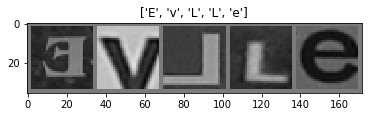

In [96]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485])
    std = np.array([0.229])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
inputs, classlist= next(iter(trainLoader))
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[classes[int(class_names[x])-1] for x in classlist])

In [97]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1,6,3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 62)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=62, bias=True)
)


In [98]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [99]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainLoader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0



[1,   100] loss: 4.122
[1,   200] loss: 4.109
[1,   300] loss: 4.082
[1,   400] loss: 4.056
[1,   500] loss: 3.988
[1,   600] loss: 3.936
[1,   700] loss: 3.887
[1,   800] loss: 3.880
[1,   900] loss: 3.848
[2,   100] loss: 3.799
[2,   200] loss: 3.829
[2,   300] loss: 3.833
[2,   400] loss: 3.863
[2,   500] loss: 3.768
[2,   600] loss: 3.792
[2,   700] loss: 3.863
[2,   800] loss: 3.746
[2,   900] loss: 3.793
[3,   100] loss: 3.849
[3,   200] loss: 3.820
[3,   300] loss: 3.760
[3,   400] loss: 3.742
[3,   500] loss: 3.752
[3,   600] loss: 3.778
[3,   700] loss: 3.753
[3,   800] loss: 3.761
[3,   900] loss: 3.772
[4,   100] loss: 3.779
[4,   200] loss: 3.772
[4,   300] loss: 3.715
[4,   400] loss: 3.715
[4,   500] loss: 3.644
[4,   600] loss: 3.695
[4,   700] loss: 3.607
[4,   800] loss: 3.712
[4,   900] loss: 3.705
[5,   100] loss: 3.615
[5,   200] loss: 3.484
[5,   300] loss: 3.372
[5,   400] loss: 3.261
[5,   500] loss: 3.288
[5,   600] loss: 3.094
[5,   700] loss: 3.124
[5,   800] 

In [100]:
PATH = './charRegnet.pth'
torch.save(net.state_dict(), PATH)

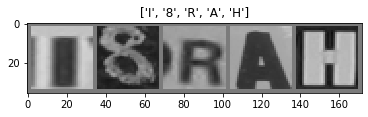

In [153]:
inputs, classlist= next(iter(valLoader))
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[classes[int(class_names[x])-1] for x in classlist])


In [154]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [155]:
outputs = net(inputs)

tensor([10, 61, 20,  2,  9])


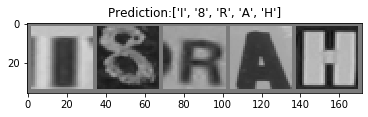

In [156]:
_, predicted = torch.max(outputs, 1)
print(predicted)
imshow(out, title="Prediction:"+str([classes[int(class_names[x])-1] for x in predicted]))
